# Jeremy Lin Shot Chart NBA 2014-15 Regular Season

In [1]:
import requests

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

## Getting the Data

In [2]:
# Using below url to scrape Jeremy Lin's shot chart data
# Jeremy Lin's PlayerID: 202391
shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?Period=0'\
                '&VsConference=&LeagueID=00&LastNGames=0&TeamID=0&Po'\
                'sition=&Location=&Outcome=&ContextMeasure=FGA&DateF'\
                'rom=&StartPeriod=&DateTo=&OpponentTeamID=0&ContextF'\
                'ilter=&RangeType=&Season=2014-15&AheadBehind=&Playe'\
                'rID=202391&EndRange=&VsDivision=&PointDiff=&RookieY'\
                'ear=&GameSegment=&Month=0&ClutchTime=&StartRange=&E'\
                'ndPeriod=&SeasonType=Regular+Season&SeasonSegment=&'\
                'GameID='

In [3]:
# Get the webpage containing the data
response = requests.get(shot_chart_url)

# Grab the headers to be used as column headers for our DataFrame
headers = response.json()['resultSets'][0]['headers']
# Grab the shot chart data
shots = response.json()['resultSets'][0]['rowSet']

In [4]:
# Create a Pandas DataFrame using the scraped shot chart data
shot_df = pd.DataFrame(shots, columns=headers)
shot_df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,0021400003,52,202391,Jeremy Lin,1610612747,Los Angeles Lakers,1,7,36,...,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,1,23,1,0
1,Shot Chart Detail,0021400003,68,202391,Jeremy Lin,1610612747,Los Angeles Lakers,1,6,44,...,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,12,14,1,0
2,Shot Chart Detail,0021400003,373,202391,Jeremy Lin,1610612747,Los Angeles Lakers,3,8,26,...,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-13,-2,1,1
3,Shot Chart Detail,0021400003,406,202391,Jeremy Lin,1610612747,Los Angeles Lakers,3,6,13,...,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,24,65,241,1,0
4,Shot Chart Detail,0021400003,471,202391,Jeremy Lin,1610612747,Los Angeles Lakers,3,1,18,...,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-5,14,1,0


**Note**: The data we want is found in `LOC_X` and `LOC_Y`. These are coordinate values for each shot attempt, which can then be plotted onto a set of axes that represent the basketball court.

## Ploting the Shot Chart Data

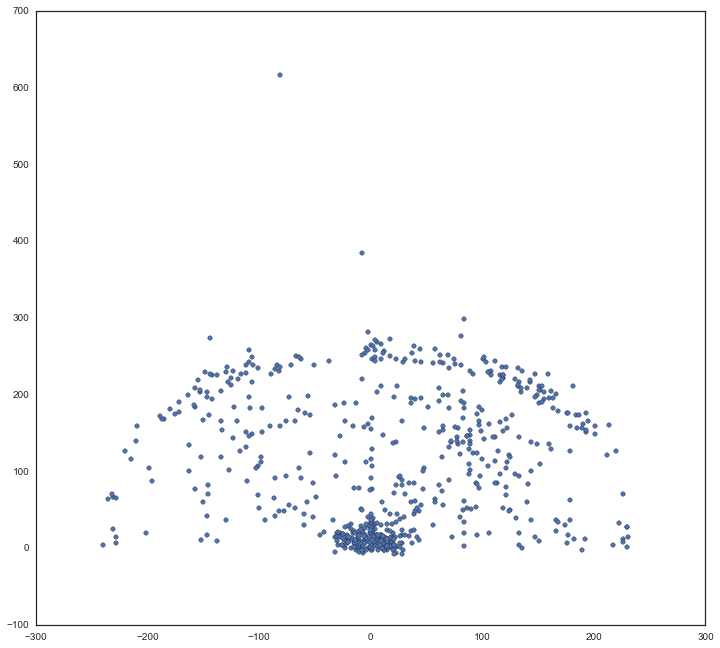

In [5]:
sns.set_style('white')
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
plt.show()

**Note:** above plot misrepresents the data. The x-axis values are the inverse of what they actually should be. Below plots the shot taken from only the right side to see this issue.

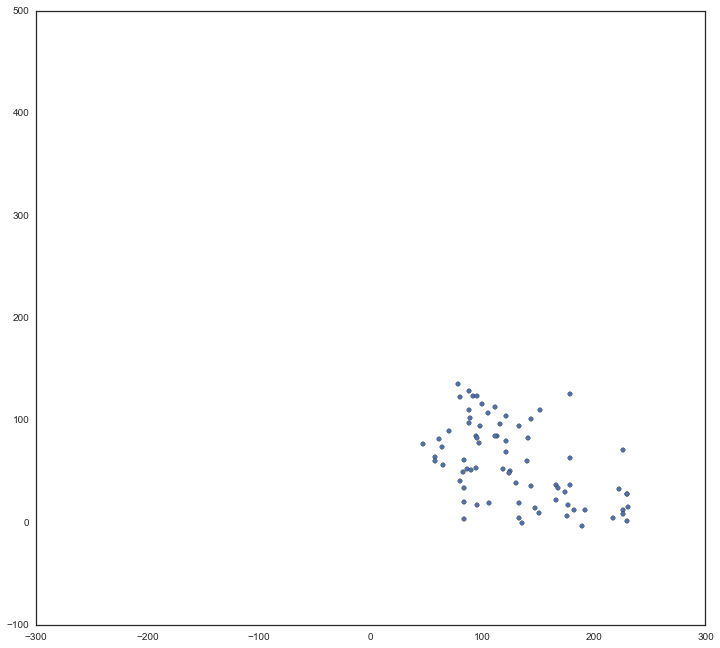

In [6]:
right = shot_df[shot_df.SHOT_ZONE_AREA == 'Right Side(R)']
plt.figure(figsize=(12,11))
plt.scatter(right.LOC_X, right.LOC_Y)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

As we can see the shots is categorized as shots from the "Right Side(R)", while to the viewers right, are actually to the left side of the hoop.
This is something that will need to fix when creating the final shot chart.

## Drawing the Court
References of NBA basketball court dimensions can be found [here](http://www.sportscourtdimensions.com/wp-content/uploads/2015/02/nba_court_dimensions_h.png) and [here](http://www.sportsknowhow.com/basketball/dimensions/nba-basketball-court-dimensions.html)
- 1 Foot (1') = 12 Inches (12")

In [7]:
from matplotlib.patches import Circle, Rectangle, Arc

In [8]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    
    # If an axes object isn't provided to plot onto, just get the current one
    if ax is None:
        ax = plt.gca() # gca() get the current axes, creating one if necessary
        
    # Create the various parts of an NBA basketball court
    
    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a 7.5 in our coordinate system
    # (radius 9" /  ??? 12") * 10 units = (9/12)*10 = 7.5
    # Circle(xy, radius=5, **kwargs)
    # Create true circle at center xy=(x,y) with given radius
    hoop = Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)
    
    # Create backboard
    #
    # Rectangle(xy, width, height, angle=0.0, **kwargs)
    # Draw a rectangle with lower left at xy=(x,y) with specified width and height
    # angle: rotation in degrees(anti-clockwise)
    # Diameter of backboard is 72" (radius is 36")
    # (72/12)*10 units = 60
    # (36/12)*10 = 30
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    
    # The paint
    # Create the outer box of the paint (width=16ft, height=19ft)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    # Create the inner box of the paint (width=12ft, height=19ft)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    
    # Create free throw top arc
    #
    # Arc(xy, width, height. angle=0.0, theta1=0.0, theta2=360.0, **kwargs)
    # xy(center of ellipse), width(length of horizontal axis), height(length of vertical axis)
    # angle(rotation in degree, anti-clockwise), theta1(starting angle of the arc in degrees)
    # theta2(ending angle of the arc in degrees)
    # If theta1 and theta2 are not provided, the arc will form a complete ellipse
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    # linestyle(or ls) = ['solid' | 'dashed' | 'dashdot' | 'dotted']
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color, linestyle='dashed')
    
    # Restricted area, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    
    # Three-point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    # Rectangle(xy, width, height, angle=0.0, **kwargs)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # Arc(xy, width, height. angle=0.0, theta1=0.0, theta2=360.0, **kwargs)
    # (play around with the 'theta' values until they lined up with the threes)
    three_arc = Arc((0,0), 475, 475, theta1=21.5, theta2=158.5, linewidth=lw, color=color)

    # Center circle
    # Arc(xy, width, height. angle=0.0, theta1=0.0, theta2=360.0, **kwargs)
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                          linewidth=lw, color=color)
    
    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                     bottom_free_throw, restricted, corner_three_a, corner_three_b,
                     three_arc, center_outer_arc, center_inner_arc]
    
    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        # Rectangle(xy, width, height, angle=0.0, **kwargs)
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)
        
    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    return ax
   

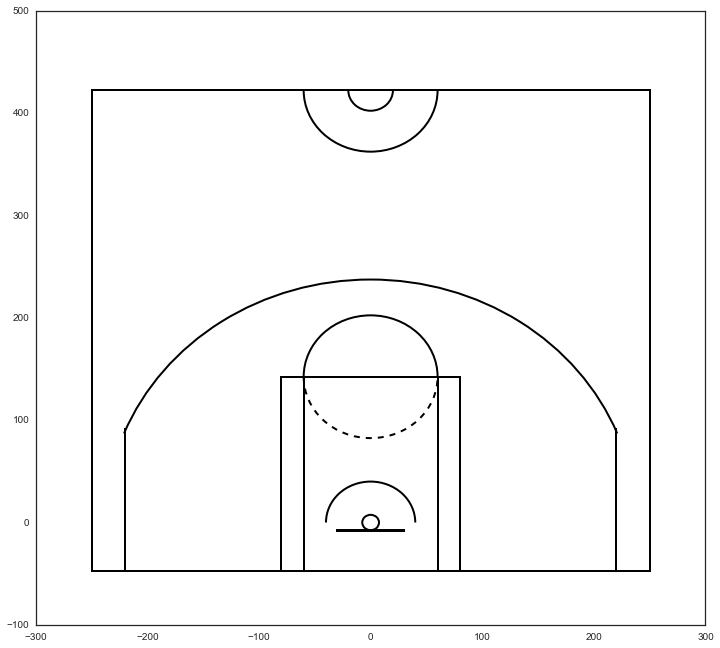

In [9]:
# Draw the court
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300, 300)
plt.ylim(-100, 500)
plt.show()

## Creating Shot Charts

Plot adjusted shot chart data along with the court. We can adjust the x-values in two ways: 
1. pass in the negative inverse of `LOC_X` to `plt.scatter()` or 
2. pass in descending values to `plt.xlim()` 

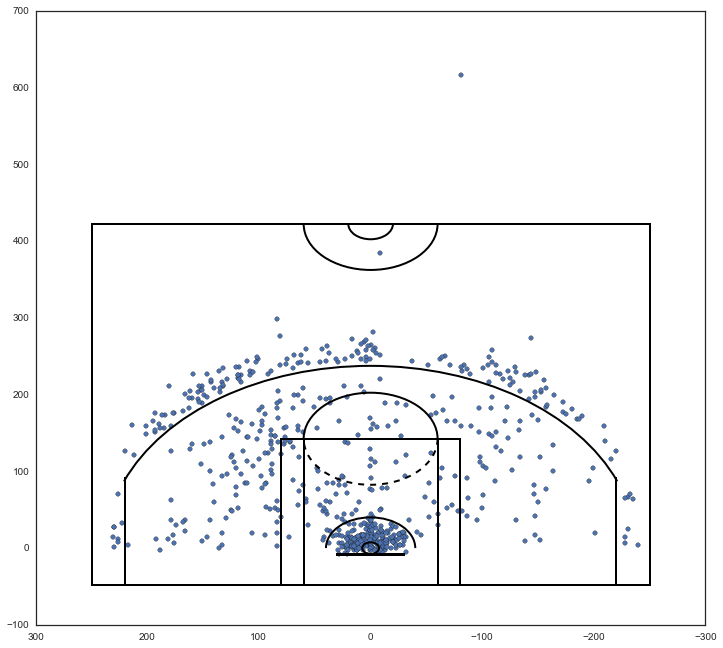

In [10]:
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
draw_court(outer_lines=True)

# Descending values along the axis from left to right
plt.xlim(300, -300)
plt.show()

Next,
- Orient shot chart with the hoop by the top of the chart (i.e. the same orientation as the shot charts on stats.nba.com). 
- Setting descending y-values from the bottom to the top of the y-axis so that we no longer need to adjust the x-values of the plot.

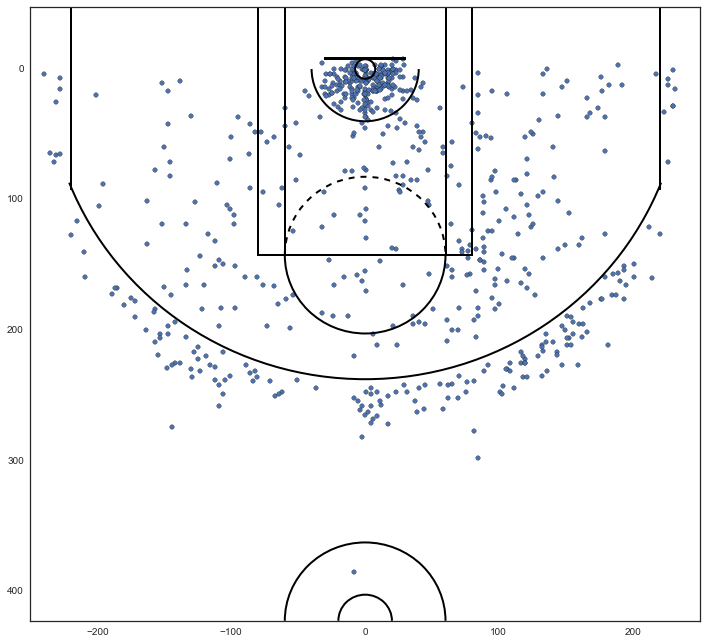

In [11]:
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
draw_court()

# Adjust plot limits to just fit in half court
plt.xlim(-250,250)

# Descending values along the y-axis from bottom to top
# in order to place the hoop by top of the plot
plt.ylim(422.5, -47.5)

# Get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)

plt.show()

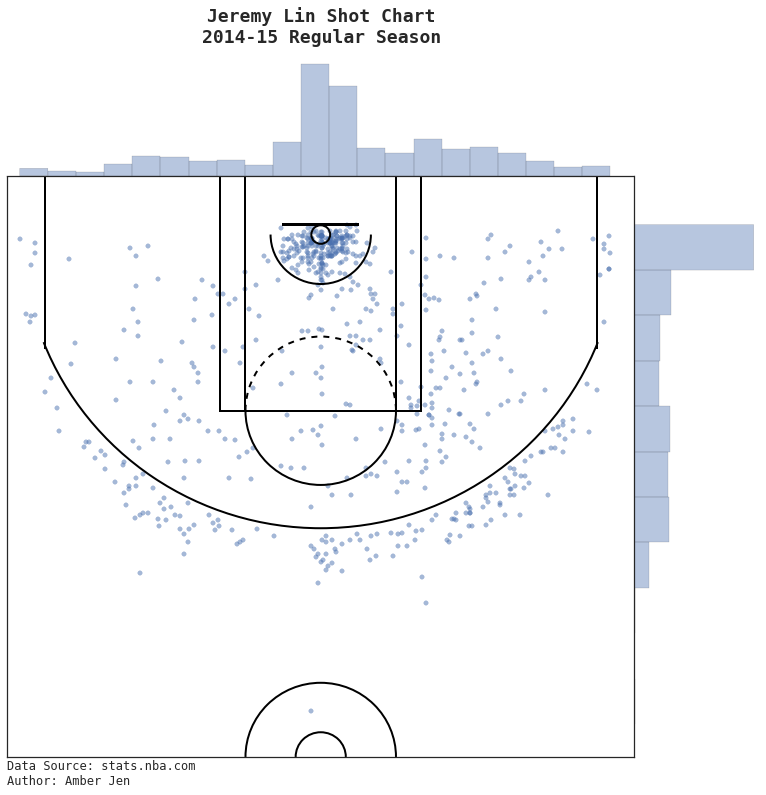

In [12]:
# Create a few shot charts using jointplot() from Seaborn

# Create jointplot
# jointplot(x, y, data=None, stat_func=?, kind=?, ... , **kwargs)
# Draw a plot of two variable with bivariate and univariate graphs
# x,y: strings or vectors, data or names of varaible in "data"
# 
# stat_func: callable or None, function used to calculate a statistic about the relationship
# and annotate the plot. Should map x , y either to a single value or to a (value, p) tuple
# set to None if you don't want to annotate the plot
#
# kind: ['scatter' | 'reg' | 'resid' | 'kde' | 'hex']
#
# space: space between the joint and marginal axes
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='scatter', space=0, alpha=0.5)

# fig.set_size_inches(w,h,forward=False) set the figure size in inches
# forward=True will cause the canvas size to be automatically updated
# e.g. you can resize the figure window from the shell
joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the 1st one called ax_joint is the one we want to
# draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order to plot half court,
# with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('Jeremy Lin Shot Chart \n2014-15 Regular Season', y=1.22, fontsize=18, family='monospace', weight='bold')

# Add data source and author
ax.text(-250, 445, 'Data Source: stats.nba.com'
       '\nAuthor: Amber Jen', fontsize=12, family='monospace')

plt.show()

## Getting a Player's image

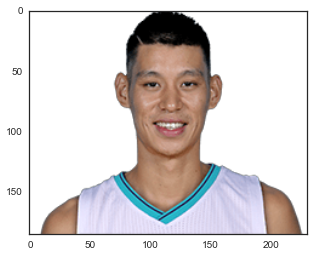

In [13]:
# Scrape Jeremy Lin's picture from stats.nba.com and place it on the plot
# We can find his image at http://stats.nba.com/media/players/230x185/202391.png
# Use urlretrieve(url, filename, ...) from urllib to retrieve the image for the plot
import urllib

# Pass in the link to the image as the 1st argument,
# the 2nd argument tells urlretrieve() what we want to scrape
pic = urllib.urlretrieve('http://stats.nba.com/media/players/230x185/202391.png', '202391.png')

# urlretrieve() returns a tuple (filename, headers) with the image as the 1st element
# and imread() reads in the image as a multi-dimensional numpy array so matplotlib can plot it
# imread(filename, format=None) Read an image from a file into an array
jlin_pic = plt.imread(pic[0])

# Plot the image
# imshow() Display an image on the axes
plt.imshow(jlin_pic)
plt.show()

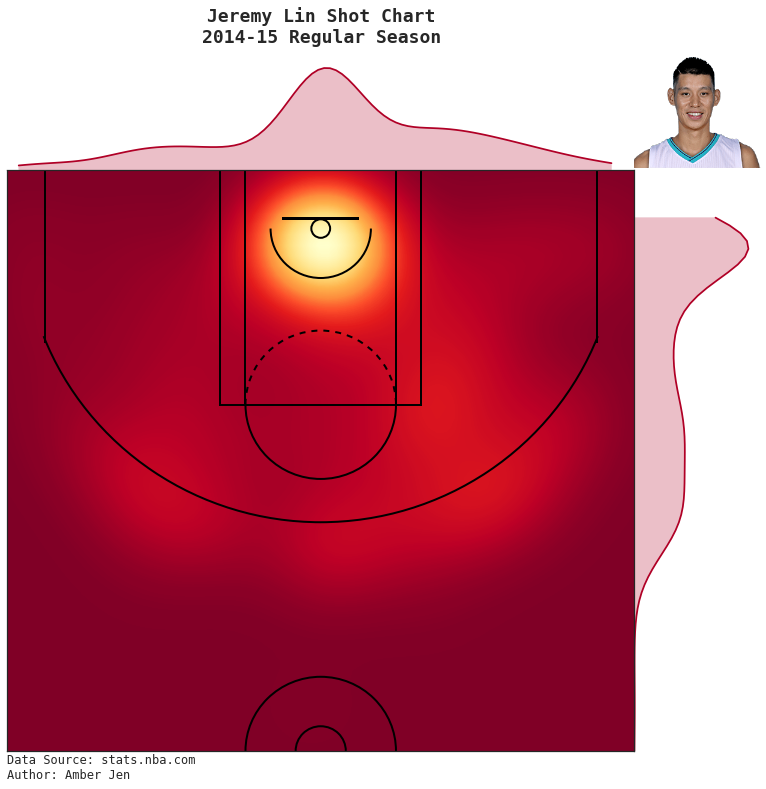

In [14]:
# Create a KDE jointplot and add JLin's pic to the plot

from matplotlib.offsetbox import OffsetImage

# Create the jointplot

# KDE: Kernel Density Estimation. 
# Get colormap(cm) for the main KDE plot
# YlOrRd: color code from the sequential colormaps in Matplotlib. Can be reversed by appending "_r"
# Matplotlib color code reference: http://matplotlib.org/examples/color/colormaps_reference.html
# Note: we can extract a color from cmap to use for the plots that lie on the side and top axes
cmap = plt.cm.YlOrRd_r

# jointplot(x, y, stat_func=?, kind=?, space=?, color=?, ... , **kwargs)
# n_levels sets the number of contour lines for the main KDE plot
joint_shot_chart2 = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                  kind='kde', space=0, color=cmap(0.1), cmap=cmap,
                                 n_levels=390)

joint_shot_chart2.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the 1st one called ax_joint is the one we want to draw our
# court onto and adjust somet other settings
ax2 = joint_shot_chart2.ax_joint
draw_court(ax2)

# Adjust the axis limits and orientation of the plot in order to plot half court,
# with the hoop by the top of the plot
ax2.set_xlim(-250,250)
ax2.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax2.set_title('Jeremy Lin Shot Chart \n2014-15 Regular Season', y=1.21, fontsize=18, family='monospace', weight='bold')

# Add data source and author
ax2.text(-250, 445, 'Data Source: stats.nba.com'
        '\nAuthor: Amber Jen', fontsize=12, family='monospace')

# Add JLin's image to the top right
# First, create OffsetImage by passing in JLin's image and set the zoom level to make
# the image small enough to fit on the plot
# matplotlib.OffsetBox: a simple container artist
# OffsetImage(arr, zoom=1, ...)
img = OffsetImage(jlin_pic, zoom=0.6)
# Pass in a tuple of (x,y) coordinates to set_offset to place the plot
# set_offset(xy): Set the offset, accepts (x,y) tuple or a callable object
img.set_offset((625,621))
# Add the image
# add_artist(a): Add any Matplotlib Artist to the container box
ax2.add_artist(img)

plt.show()

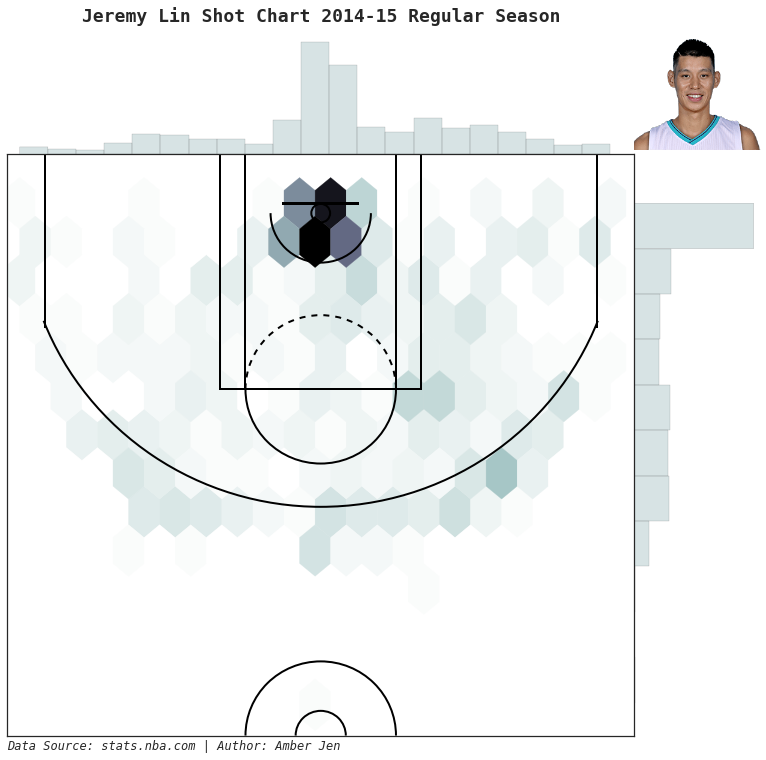

In [15]:
# Another jointplot with hexbins
# Create jointplot
# jointplot(x, y, stat_func=?, kind=?, space=?, color=?, ... , **kwargs)
cmap2 = plt.cm.bone_r #plt.cm.gist_heat_r # plt.cm.bone_r
joint_shot_chart3 = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='hex', space=0, color=cmap2(0.3), cmap=cmap2)

joint_shot_chart3.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint is the one we want to
# draw the court onto 
ax3 = joint_shot_chart3.ax_joint
draw_court(ax3)

# Adjust the axis limits and orientation of the plot in order to plot half court,
# with the hoop by the top of the plot
ax3.set_xlim(-250, 250)
ax3.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax3.set_title('Jeremy Lin Shot Chart 2014-15 Regular Season', y=1.22, fontsize=18, family='monospace', weight='bold')

# Add data source and author
ax3.text(-250, 434, 'Data Source: stats.nba.com'
        ' | Author: Amber Jen', fontsize=12, family='monospace', style='italic')

# Add JLin's image to the top right
img2 = OffsetImage(jlin_pic, zoom=0.6)
img2.set_offset((625,610))
ax3.add_artist(img2)


plt.show()

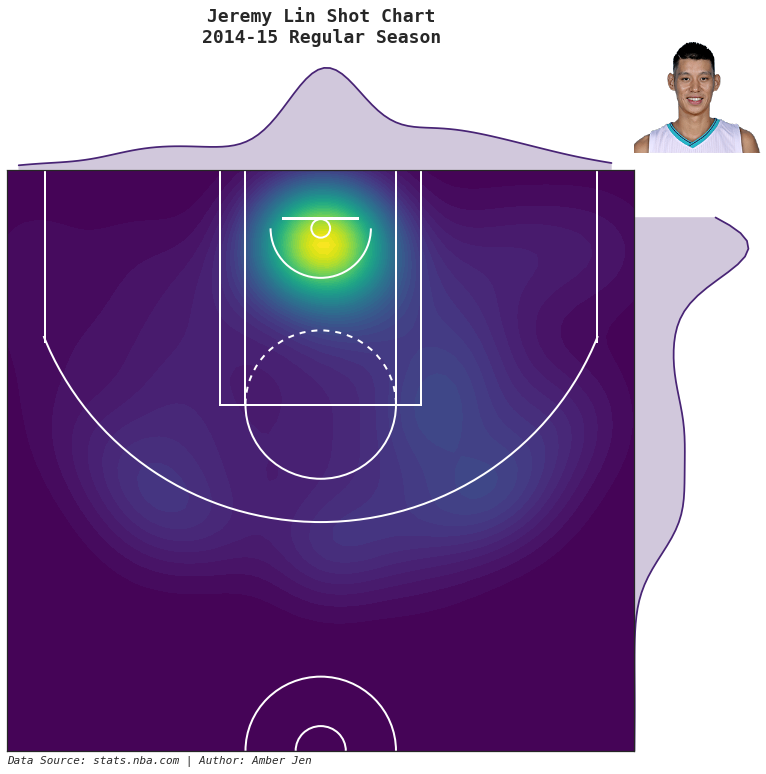

In [16]:
# Re-create the KDE plot using new Viridis matplotlib colormap
# http://bids.github.io/colormap/
# import the object that contains the viridis colormap
# Download the source at here: https://github.com/BIDS/colormap/blob/master/option_d.py
from option_d import test_cm as viridis

# Register and set Viridis as the colormap for the plot
plt.register_cmap(cmap=viridis)
cmap3 = plt.get_cmap(viridis.name)

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart4 = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                  kind='kde', space=0, color=cmap3(0.1),
                                  cmap=cmap3, n_levels=50)

joint_shot_chart4.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_plot is the the one we want to
# draw the court onto and adjust some other settings
ax4 = joint_shot_chart4.ax_joint
draw_court(ax4, color='white', lw=2)

# Adjust the asix limits and orientation of the plot in order to plot half court,
# with the hoop by the top of the plot
ax4.set_xlim(-250,250)
ax4.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax4.set_title('Jeremy Lin Shot Chart \n2014-15 Regular Season', y=1.21, fontsize=18, family='monospace', weight='bold')

# Add data source and author
ax4.text(-250,433, 'Data Source: stats.nba.com'
         ' | Author: Amber Jen', fontsize=11, family='monospace', style='italic')

# Add JLin's image to the top right
# First, create OffsetImage by passing in JLin's image and set the zoom level to 
# make the image small enough to fit on the plot
img3 = OffsetImage(jlin_pic, zoom=0.6)
# Pass in a tuple of (x,y) coordinates to set_offset() to place the plot we want
img3.set_offset((625,621))
# Add the image
ax4.add_artist(img3)

plt.show()

In [17]:
import sys
print 'Python version:', sys.version_info
print 'Requests version:', requests.__version__
print 'Urllib version:', urllib.__version__
import matplotlib as mpl
print 'Matplotlib version:', mpl.__version__
print 'Seaborn version:', sns.__version__
print 'Pandas version:', pd.__version__

Python version: sys.version_info(major=2, minor=7, micro=5, releaselevel='final', serial=0)
Requests version: 2.7.0
Urllib version: 1.17
Matplotlib version: 1.4.3
Seaborn version: 0.6.0
Pandas version: 0.16.2
